In [ ]:
pip install numpy pandas matplotlib fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp311-cp311-linux_x86_64.whl size=542099 sha256=2f627b9eff40b76da9a64dbf63a71e6c5643e483e25563a38349daae5ba36b2e
  Stored in directory: /root/.cache/pip/wheels/5c/8a/f6/fd3df9a9714677410a5ccbf3ca519e66db4a54a1c46ea95332
Successfully built fastdtw


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def load_csv_data(file1_path, file2_path, column_name="pm2_5"):
    """Load and validate time series data from two CSV files"""
    df1 = pd.read_csv(file1_path, parse_dates=["timestamp"])
    df2 = pd.read_csv(file2_path, parse_dates=["timestamp"])

    if column_name not in df1.columns or column_name not in df2.columns:
        available_cols = [c for c in df1.columns if c not in ['', 'device_id', 'timestamp']]
        raise ValueError(f"Column '{column_name}' not found. Available columns: {available_cols}")

    ts1 = np.array(df1[column_name].values, dtype=np.float64).flatten()
    ts2 = np.array(df2[column_name].values, dtype=np.float64).flatten()

    print(f"\nData validation:")
    print(f"- {file1_path} length: {len(ts1)}, first values: {ts1[:5]}")
    print(f"- {file2_path} length: {len(ts2)}, first values: {ts2[:5]}")

    return ts1, ts2

def compare_with_fastdtw(ts1, ts2):
    """Compute DTW distance with input validation"""
    if len(ts1) == 0 or len(ts2) == 0:
        raise ValueError("Empty time series detected")

    distance, path = fastdtw(ts1.reshape(-1, 1), ts2.reshape(-1, 1), dist=euclidean)
    return distance, np.array(path)  # Convert path to numpy array

def plot_results(ts1, ts2, path, column_name, distance):
    """Visualize results with proper path handling"""
    plt.figure(figsize=(14, 10))

    # Time series plot
    plt.subplot(2, 1, 1)
    plt.plot(ts1, 'b-', label='Raw', alpha=0.7)
    plt.plot(ts2, 'g-', label='Working', alpha=0.7)
    plt.title(f'DTW Alignment ({column_name})\nDistance: {distance:,.2f}')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

    # Warping path plot
    plt.subplot(2, 1, 2)
    if isinstance(path, list):  # Backup conversion if not already array
        path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], 'ro-', markersize=2, alpha=0.5)
    plt.xlabel('Raw Index')
    plt.ylabel('Working Index')
    plt.title('Warping Path')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def main(file1_path, file2_path, column_name="pm2_5"):
    """Complete analysis pipeline"""
    try:
        print(f"Comparing '{column_name}' between:")
        print(f"- Raw: {file1_path}")
        print(f"- Working: {file2_path}")

        ts1, ts2 = load_csv_data(file1_path, file2_path, column_name)
        distance, path = compare_with_fastdtw(ts1, ts2)

        print(f"\nDTW Distance: {distance:,.2f}")
        print(f"Path length: {len(path)} points")

        plot_results(ts1, ts2, path, column_name, distance)

    except Exception as e:
        print(f"\nError: {str(e)}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    # Configuration
    file1 = "/content/Cigg_Working_1.csv"
    file2 = "/content/Cigg_Working_2.csv"
    column = "pm2_5"

    main(file1, file2, column)

Comparing 'pm2_5' between:
- Raw: /content/Cigg_Working_1.csv
- Working: /content/Cigg_Working_2.csv

Error: [Errno 2] No such file or directory: '/content/Cigg_Working_2.csv'


Traceback (most recent call last):
  File "/tmp/ipython-input-2-2448091737.py", line 66, in main
    ts1, ts2 = load_csv_data(file1_path, file2_path, column_name)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2-2448091737.py", line 10, in load_csv_data
    df2 = pd.read_csv(file2_path, parse_dates=["timestamp"])
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer, kwds)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 620, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 1620, in __init__
    self._engine = self._make_engine(f, self.engine)
                   ^^^^^^

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def load_csv_data(file1_path, file2_path, column_name="pm2_5"):
    """Load and validate time series data from two CSV files"""
    df1 = pd.read_csv(file1_path, parse_dates=["timestamp"])
    df2 = pd.read_csv(file2_path, parse_dates=["timestamp"])

    if column_name not in df1.columns or column_name not in df2.columns:
        available_cols = [c for c in df1.columns if c not in ['', 'device_id', 'timestamp']]
        raise ValueError(f"Column '{column_name}' not found. Available columns: {available_cols}")

    ts1 = np.array(df1[column_name].values, dtype=np.float64).flatten()
    ts2 = np.array(df2[column_name].values, dtype=np.float64).flatten()

    print(f"\nData validation:")
    print(f"- {file1_path} (Faulty) range: [{ts1.min():.2f}, {ts1.max():.2f}]")
    print(f"- {file2_path} (Working) range: [{ts2.min():.2f}, {ts2.max():.2f}]")

    return ts1, ts2

def compare_with_fastdtw(ts1, ts2):
    """Compute DTW distance with input validation"""
    if len(ts1) == 0 or len(ts2) == 0:
        raise ValueError("Empty time series detected")

    distance, path = fastdtw(ts1.reshape(-1, 1), ts2.reshape(-1, 1), dist=euclidean)
    return distance, np.array(path)

def plot_dual_scale_results(ts1, ts2, path, column_name, distance):
    """Visualize with dual y-axis scales"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

    # Main plot with two y-axes
    ax1.set_title(f'DTW Alignment ({column_name})\nDistance: {distance:,.2f}')

    # Faulty sensor (left axis)
    color = 'tab:blue'
    ax1.plot(ts1, color=color, label='Faulty Sensor')
    ax1.set_ylabel('Faulty Values (0-500)', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(0, 150)

    # Working sensor (right axis)
    color = 'tab:red'
    ax1_right = ax1.twinx()
    ax1_right.plot(ts2, color=color, label='Working Sensor')
    ax1_right.set_ylabel('Working Values (5000+)', color=color)
    ax1_right.tick_params(axis='y', labelcolor=color)
    ax1_right.set_ylim(0, max(ts2)*1.1)

    # Combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_right.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    # Warping path plot
    ax2.plot(path[:, 0], path[:, 1], 'ro-', markersize=2, alpha=0.5)
    ax2.set_xlabel('Faulty Sensor Index')
    ax2.set_ylabel('Working Sensor Index')
    ax2.set_title('Warping Path')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

def main(file1_path, file2_path, column_name="pm2_5"):
    """Complete analysis pipeline"""
    try:
        print(f"Comparing '{column_name}' between:")
        print(f"- Faulty: {file1_path}")
        print(f"- Working: {file2_path}")

        ts1, ts2 = load_csv_data(file1_path, file2_path, column_name)
        distance, path = compare_with_fastdtw(ts1, ts2)

        print(f"\nDTW Distance: {distance:,.2f}")
        print(f"Path length: {len(path)} points")

        plot_dual_scale_results(ts1, ts2, path, column_name, distance)

    except Exception as e:
        print(f"\nError: {str(e)}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    # Configuration
    file1 = "/content/Cigg_Faulty_1.csv"
    file2 = "/content/Cigg_Working_2.csv"
    column = "pm2_5"  # Try also: "temperature", "co", "humidity"


    main(file1, file2, column)

Comparing 'pm2_5' between:
- Faulty: /content/Cigg_Faulty_1.csv
- Working: /content/Cigg_Working_2.csv

Error: [Errno 2] No such file or directory: '/content/Cigg_Faulty_1.csv'


Traceback (most recent call last):
  File "/tmp/ipython-input-3-2977910609.py", line 77, in main
    ts1, ts2 = load_csv_data(file1_path, file2_path, column_name)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-3-2977910609.py", line 9, in load_csv_data
    df1 = pd.read_csv(file1_path, parse_dates=["timestamp"])
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer, kwds)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 620, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 1620, in __init__
    self._engine = self._make_engine(f, self.engine)
                   ^^^^^^^

Moving Average and Savitzky-Golay have done in working dataset,and compare it with raw working data without 0-1 scale.


Comparing with Moving Average Composite
Raw: /content/Cigg_Working_1.csv
Composite: /content/filtered_data_composite_mov_avg.csv

Reference duration: 611.00 seconds
Data loaded:
- Raw: 22 points (original duration: 611.00s)
- Composite: 215 points (original duration: 886.00s)

DTW Results:
- Distance: 267,539.50
- Path length: 218 points


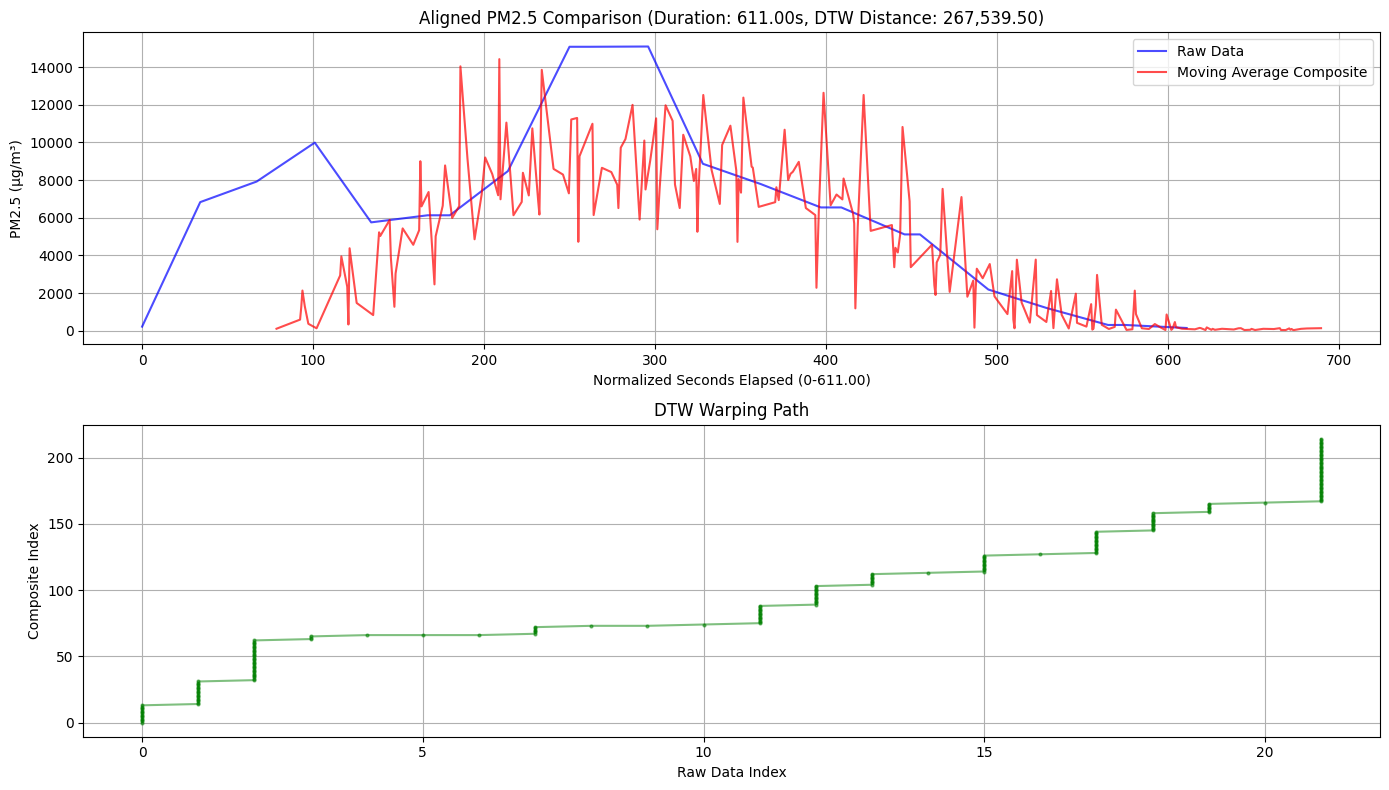


Comparing with Savitzky-Golay Composite
Raw: /content/Cigg_Working_1.csv
Composite: /content/filtered_data_composite_savgol.csv

Reference duration: 611.00 seconds
Data loaded:
- Raw: 22 points (original duration: 611.00s)
- Composite: 230 points (original duration: 1000.00s)

DTW Results:
- Distance: 281,111.44
- Path length: 232 points


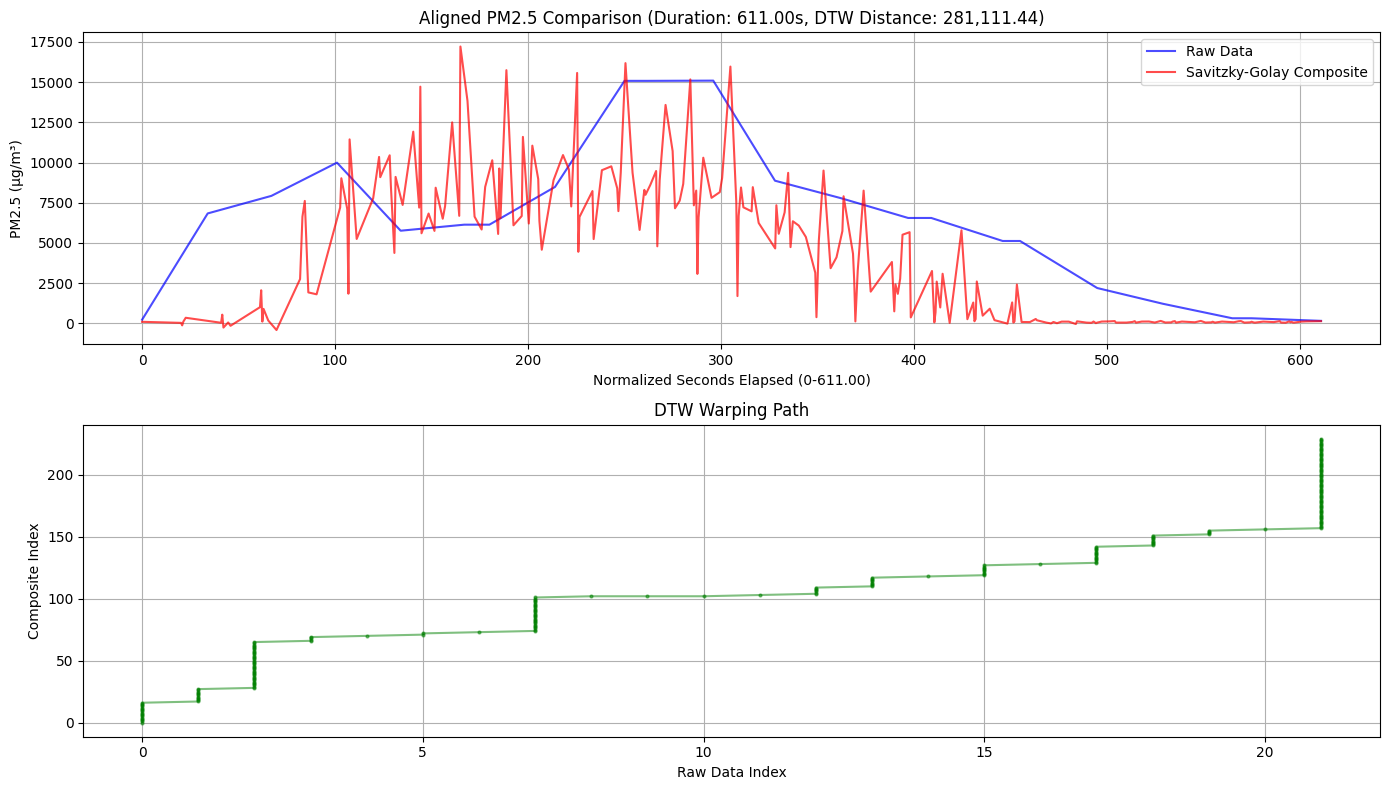

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def load_and_align_data(raw_path, composite_path, column_name="pm2_5"):
    """Load and align data based on minimum duration"""
    # Load data
    raw = pd.read_csv(raw_path, parse_dates=["timestamp"])
    composite = pd.read_csv(composite_path)

    # Validate columns
    if column_name not in raw.columns or column_name not in composite.columns:
        available = [c for c in raw.columns if c not in ['', 'device_id', 'timestamp']]
        raise ValueError(f"Column '{column_name}' not found. Available: {available}")

    # Calculate durations
    raw_duration = (raw["timestamp"].max() - raw["timestamp"].min()).total_seconds()
    comp_duration = composite["seconds_elapsed"].max() - composite["seconds_elapsed"].min()

    # Use the shorter duration as reference
    ref_duration = min(raw_duration, comp_duration)
    print(f"\nReference duration: {ref_duration:.2f} seconds")

    # Normalize both time series to the reference duration
    raw_seconds = (raw["timestamp"] - raw["timestamp"].min()).dt.total_seconds().values
    raw_seconds = raw_seconds * (ref_duration / raw_duration)
    raw_values = raw[column_name].values

    comp_seconds = composite["seconds_elapsed"].values
    comp_seconds = comp_seconds * (ref_duration / comp_duration)
    comp_values = composite[column_name].values

    print(f"Data loaded:")
    print(f"- Raw: {len(raw_values)} points (original duration: {raw_duration:.2f}s)")
    print(f"- Composite: {len(comp_values)} points (original duration: {comp_duration:.2f}s)")

    return raw_seconds, raw_values, comp_seconds, comp_values, ref_duration

def compare_with_dtw(ts1, ts2):
    """Compute DTW distance between two time series"""
    if len(ts1) == 0 or len(ts2) == 0:
        raise ValueError("Empty time series detected")

    ts1_2d = ts1.reshape(-1, 1)
    ts2_2d = ts2.reshape(-1, 1)

    distance, path = fastdtw(ts1_2d, ts2_2d, dist=euclidean)
    return distance, np.array(path)

def plot_aligned_comparison(raw_sec, raw_val, comp_sec, comp_val, path, distance, method_name, duration):
    """Visualize the aligned comparison"""
    plt.figure(figsize=(14, 8))

    # Time-aligned plot
    plt.subplot(2, 1, 1)
    plt.plot(raw_sec, raw_val, 'b-', label='Raw Data', alpha=0.7)
    plt.plot(comp_sec, comp_val, 'r-', label=f'{method_name} Composite', alpha=0.7)
    plt.title(f'Aligned PM2.5 Comparison (Duration: {duration:.2f}s, DTW Distance: {distance:,.2f})')
    plt.xlabel('Normalized Seconds Elapsed (0-{:.2f})'.format(duration))
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.grid(True)

    # Warping path
    plt.subplot(2, 1, 2)
    plt.plot(path[:, 0], path[:, 1], 'go-', markersize=2, alpha=0.5)
    plt.xlabel('Raw Data Index')
    plt.ylabel('Composite Index')
    plt.title('DTW Warping Path')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def analyze_comparison(raw_path, composite_path, method_name):
    """Complete analysis pipeline with time alignment"""
    try:
        print(f"\n{'='*50}")
        print(f"Comparing with {method_name} Composite")
        print(f"Raw: {raw_path}")
        print(f"Composite: {composite_path}")

        # Load and align data
        raw_sec, raw_val, comp_sec, comp_val, duration = load_and_align_data(
            raw_path, composite_path)

        # Compute DTW
        distance, path = compare_with_dtw(raw_val, comp_val)
        print(f"\nDTW Results:")
        print(f"- Distance: {distance:,.2f}")
        print(f"- Path length: {len(path)} points")

        # Plot aligned comparison
        plot_aligned_comparison(raw_sec, raw_val, comp_sec, comp_val,
                              path, distance, method_name, duration)

    except Exception as e:
        print(f"Error in {method_name} analysis: {str(e)}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    # Configuration
    raw_data_path = "/content/Cigg_Working_1.csv"
    mov_avg_path = "/content/filtered_data_composite_mov_avg.csv"
    savgol_path = "/content/filtered_data_composite_savgol.csv"

    # Analyze both composites
    analyze_comparison(raw_data_path, mov_avg_path, "Moving Average")
    analyze_comparison(raw_data_path, savgol_path, "Savitzky-Golay")


Comparing with Moving Average Composite (Y-axis normalized)
Raw: /content/Cigg_Working_1.csv
Composite: /content/filtered_data_composite_mov_avg.csv

Reference duration: 611.00 seconds
Data loaded (y-values normalized to 0-1 scale):
- Raw: 22 points (original duration: 611.00s)
- Composite: 215 points (original duration: 886.00s)

DTW Results (Normalized Scale):
- Distance: 18.50
- Path length: 218 points


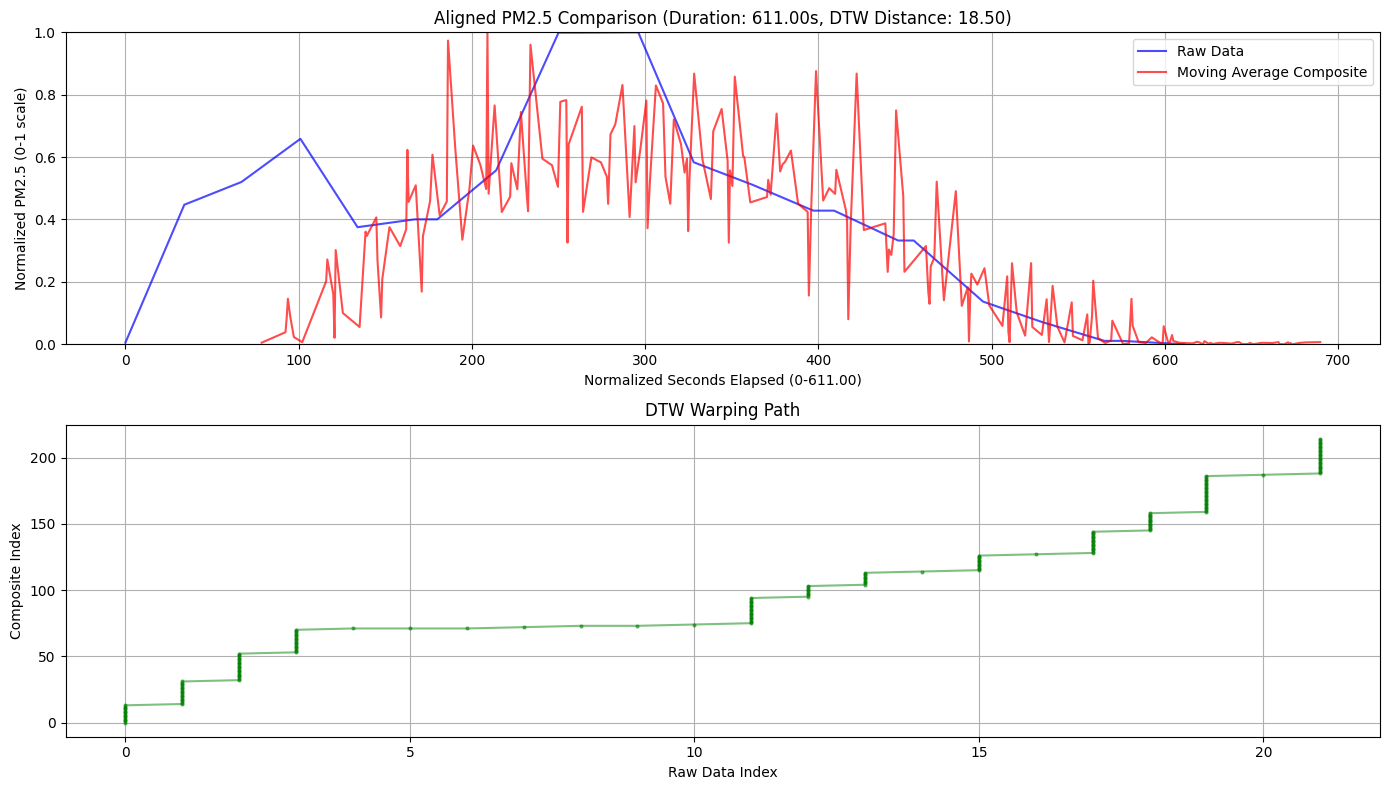


Comparing with Savitzky-Golay Composite (Y-axis normalized)
Raw: /content/Cigg_Working_1.csv
Composite: /content/filtered_data_composite_savgol.csv

Reference duration: 611.00 seconds
Data loaded (y-values normalized to 0-1 scale):
- Raw: 22 points (original duration: 611.00s)
- Composite: 230 points (original duration: 1000.00s)

DTW Results (Normalized Scale):
- Distance: 18.07
- Path length: 233 points


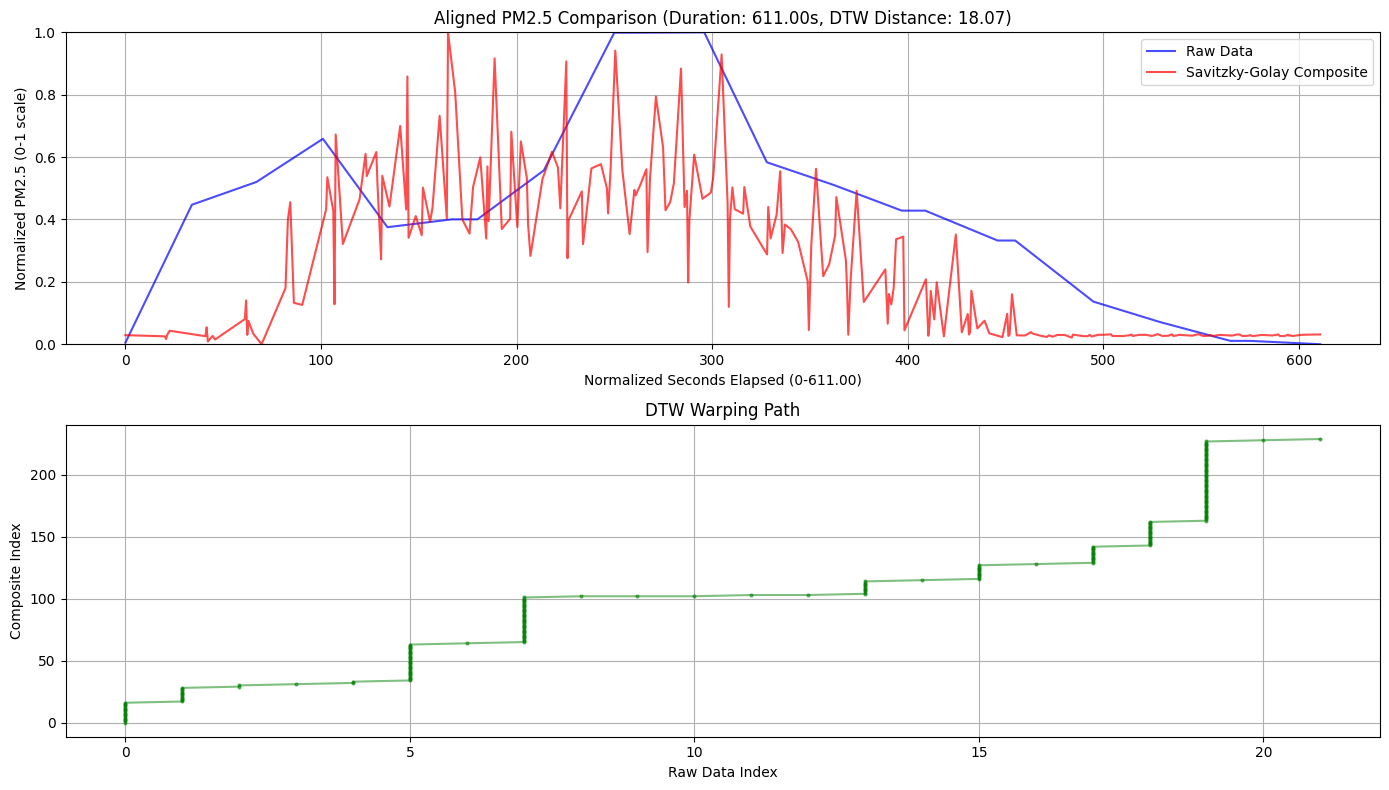

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import MinMaxScaler

def load_and_align_data(raw_path, composite_path, column_name="pm2_5"):
    """Load and align data with y-axis normalization"""
    # Load data
    raw = pd.read_csv(raw_path, parse_dates=["timestamp"])
    composite = pd.read_csv(composite_path)

    # Validate columns
    if column_name not in raw.columns or column_name not in composite.columns:
        available = [c for c in raw.columns if c not in ['', 'device_id', 'timestamp']]
        raise ValueError(f"Column '{column_name}' not found. Available: {available}")

    # Calculate durations
    raw_duration = (raw["timestamp"].max() - raw["timestamp"].min()).total_seconds()
    comp_duration = composite["seconds_elapsed"].max() - composite["seconds_elapsed"].min()
    ref_duration = min(raw_duration, comp_duration)

    # Normalize time to reference duration
    raw_seconds = (raw["timestamp"] - raw["timestamp"].min()).dt.total_seconds().values
    raw_seconds = raw_seconds * (ref_duration / raw_duration)

    comp_seconds = composite["seconds_elapsed"].values
    comp_seconds = comp_seconds * (ref_duration / comp_duration)

    # Normalize y-values to 0-1 scale
    scaler = MinMaxScaler()
    raw_values = scaler.fit_transform(raw[[column_name]]).flatten()
    comp_values = scaler.fit_transform(composite[[column_name]]).flatten()

    print(f"\nReference duration: {ref_duration:.2f} seconds")
    print(f"Data loaded (y-values normalized to 0-1 scale):")
    print(f"- Raw: {len(raw_values)} points (original duration: {raw_duration:.2f}s)")
    print(f"- Composite: {len(comp_values)} points (original duration: {comp_duration:.2f}s)")

    return raw_seconds, raw_values, comp_seconds, comp_values, ref_duration

def compare_with_dtw(ts1, ts2):
    """Compute DTW distance between normalized time series"""
    if len(ts1) == 0 or len(ts2) == 0:
        raise ValueError("Empty time series detected")

    ts1_2d = ts1.reshape(-1, 1)
    ts2_2d = ts2.reshape(-1, 1)

    distance, path = fastdtw(ts1_2d, ts2_2d, dist=euclidean)
    return distance, np.array(path)

def plot_normalized_comparison(raw_sec, raw_val, comp_sec, comp_val, path, distance, method_name, duration):
    """Visualize comparison with normalized y-axis"""
    plt.figure(figsize=(14, 8))

    # Time-aligned plot with 0-1 y-axis
    plt.subplot(2, 1, 1)
    plt.plot(raw_sec, raw_val, 'b-', label='Raw Data', alpha=0.7)
    plt.plot(comp_sec, comp_val, 'r-', label=f'{method_name} Composite', alpha=0.7)
    plt.title(f'Aligned PM2.5 Comparison (Duration: {duration:.2f}s, DTW Distance: {distance:,.2f})')
    plt.xlabel('Normalized Seconds Elapsed (0-{:.2f})'.format(duration))
    plt.ylabel('Normalized PM2.5 (0-1 scale)')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1)  # Ensure y-axis is 0-1

    # Warping path
    plt.subplot(2, 1, 2)
    plt.plot(path[:, 0], path[:, 1], 'go-', markersize=2, alpha=0.5)
    plt.xlabel('Raw Data Index')
    plt.ylabel('Composite Index')
    plt.title('DTW Warping Path')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def analyze_comparison(raw_path, composite_path, method_name):
    """Complete analysis pipeline with normalized y-axis"""
    try:
        print(f"\n{'='*50}")
        print(f"Comparing with {method_name} Composite (Y-axis normalized)")
        print(f"Raw: {raw_path}")
        print(f"Composite: {composite_path}")

        # Load and align data with normalization
        raw_sec, raw_val, comp_sec, comp_val, duration = load_and_align_data(
            raw_path, composite_path)

        # Compute DTW on normalized data
        distance, path = compare_with_dtw(raw_val, comp_val)
        print(f"\nDTW Results (Normalized Scale):")
        print(f"- Distance: {distance:,.2f}")
        print(f"- Path length: {len(path)} points")

        # Plot normalized comparison
        plot_normalized_comparison(raw_sec, raw_val, comp_sec, comp_val,
                                 path, distance, method_name, duration)

    except Exception as e:
        print(f"Error in {method_name} analysis: {str(e)}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    # Configuration
    raw_data_path = "/content/Cigg_Working_1.csv"
    mov_avg_path = "/content/filtered_data_composite_mov_avg.csv"
    savgol_path = "/content/filtered_data_composite_savgol.csv"

    # Analyze both composites with normalized y-axis
    analyze_comparison(raw_data_path, mov_avg_path, "Moving Average")
    analyze_comparison(raw_data_path, savgol_path, "Savitzky-Golay")

Moving Average and Savitzky-Golay have done in working dataset,and compare it with raw working data's Moving Average and Savitzky-Golay in 0-1 scale.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import MinMaxScaler

def load_and_normalize_data(file_path, column_name="pm2_5"):
    """Load and normalize data to 0-1 scale"""
    df = pd.read_csv(file_path)

    if column_name not in df.columns:
        available = [c for c in df.columns if c in ['pm2_5', 'co', 'voc', 'co2', 'temperature', 'humidity']]
        raise ValueError(f"Column '{column_name}' not found. Available: {available}")

    # Normalize the selected column
    scaler = MinMaxScaler()
    values = scaler.fit_transform(df[[column_name]]).flatten()
    seconds = df['seconds_elapsed'].values

    print(f"Loaded {file_path}: {len(values)} points (duration: {seconds[-1]:.2f} sec)")
    return seconds, values

def align_time_series(sec1, val1, sec2, val2):
    """Align two time series to the shorter duration"""
    duration1 = sec1[-1]
    duration2 = sec2[-1]

    if duration1 < duration2:
        print(f"Using {duration1:.2f} sec as reference (shorter duration)")
        # Find the index where sec2 exceeds duration1
        idx = np.searchsorted(sec2, duration1, side='right')
        return sec1, val1, sec2[:idx], val2[:idx]
    else:
        print(f"Using {duration2:.2f} sec as reference (shorter duration)")
        # Find the index where sec1 exceeds duration2
        idx = np.searchsorted(sec1, duration2, side='right')
        return sec1[:idx], val1[:idx], sec2, val2

def compare_with_dtw(ts1, ts2):
    """Compute DTW distance between two normalized time series"""
    if len(ts1) == 0 or len(ts2) == 0:
        raise ValueError("Empty time series detected")

    ts1_2d = ts1.reshape(-1, 1)
    ts2_2d = ts2.reshape(-1, 1)

    distance, path = fastdtw(ts1_2d, ts2_2d, dist=euclidean)
    return distance, np.array(path)

def plot_comparison(sec1, val1, sec2, val2, path, distance, name1, name2):
    """Visualize the comparison of two normalized time series"""
    plt.figure(figsize=(14, 8))

    # Time series comparison plot
    plt.subplot(2, 1, 1)
    plt.plot(sec1, val1, 'b-', label=name1, alpha=0.7)
    plt.plot(sec2, val2, 'r-', label=name2, alpha=0.7)
    plt.title(f'Normalized PM2.5 Comparison (DTW Distance: {distance:,.2f})')
    plt.xlabel('Seconds Elapsed')
    plt.ylabel('Normalized PM2.5 (0-1)')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1)

    # Warping path plot
    plt.subplot(2, 1, 2)
    plt.plot(path[:, 0], path[:, 1], 'go-', markersize=2, alpha=0.5)
    plt.xlabel(f'{name1} Index')
    plt.ylabel(f'{name2} Index')
    plt.title('DTW Warping Path')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def run_comparison(file1, file2, name1, name2):
    """Run complete comparison pipeline for two files"""
    try:
        print(f"\n{'='*50}")
        print(f"Comparing {name1} vs {name2}")

        # Load and normalize both datasets
        sec1, val1 = load_and_normalize_data(file1)
        sec2, val2 = load_and_normalize_data(file2)

        # Align time series to the shorter duration
        sec1, val1, sec2, val2 = align_time_series(sec1, val1, sec2, val2)
        print(f"After alignment: {len(val1)} vs {len(val2)} points")

        # Compute DTW distance
        distance, path = compare_with_dtw(val1, val2)
        print(f"\nDTW Results:")
        print(f"- Distance: {distance:,.2f}")
        print(f"- Path length: {len(path)} points")

        # Plot comparison
        plot_comparison(sec1, val1, sec2, val2, path, distance, name1, name2)

    except Exception as e:
        print(f"Error in comparison: {str(e)}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    # File paths
    mov_avg_results = "/content/Cigg_Results_mov_avg.csv"
    savgol_results = "/content/Cigg_Results_savgol.csv"
    mov_avg_composite = "/content/filtered_data_composite_mov_avg.csv"
    savgol_composite = "/content/filtered_data_composite_savgol.csv"

    # First set of comparisons: mov_avg_results vs composites
    print("\nFIRST SET: MOVING AVERAGE RESULTS COMPARISONS")
    run_comparison(mov_avg_results, mov_avg_composite,
                  "Results (Mov Avg)", "Composite (Mov Avg)")
    run_comparison(mov_avg_results, savgol_composite,
                  "Results (Mov Avg)", "Composite (SavGol)")

    # Second set of comparisons: savgol_results vs composites
    print("\nSECOND SET: SAVITZKY-GOLAY RESULTS COMPARISONS")
    run_comparison(savgol_results, mov_avg_composite,
                  "Results (SavGol)", "Composite (Mov Avg)")
    run_comparison(savgol_results, savgol_composite,
                  "Results (SavGol)", "Composite (SavGol)")


FIRST SET: MOVING AVERAGE RESULTS COMPARISONS

Comparing Results (Mov Avg) vs Composite (Mov Avg)
Error in comparison: [Errno 2] No such file or directory: '/content/Cigg_Results_mov_avg.csv'

Comparing Results (Mov Avg) vs Composite (SavGol)
Error in comparison: [Errno 2] No such file or directory: '/content/Cigg_Results_mov_avg.csv'

SECOND SET: SAVITZKY-GOLAY RESULTS COMPARISONS

Comparing Results (SavGol) vs Composite (Mov Avg)
Error in comparison: [Errno 2] No such file or directory: '/content/Cigg_Results_savgol.csv'

Comparing Results (SavGol) vs Composite (SavGol)
Error in comparison: [Errno 2] No such file or directory: '/content/Cigg_Results_savgol.csv'


Traceback (most recent call last):
  File "/tmp/ipython-input-6-3754585103.py", line 84, in run_comparison
    sec1, val1 = load_and_normalize_data(file1)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-6-3754585103.py", line 10, in load_and_normalize_data
    df = pd.read_csv(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer, kwds)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 620, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 1620, in __init__
    self._engine = self._make_engine(f, self.engine)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-package

Moving Average and Savitzky-Golay have done in working and faulty both tha dataset,and both data scale in 0-1 scale and compare it.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import MinMaxScaler

def load_and_normalize_data(file_path, column_name="pm2_5"):
    """Load and normalize data to 0-1 scale"""
    df = pd.read_csv(file_path)

    if column_name not in df.columns:
        available = [c for c in df.columns if c in ['pm2_5', 'co', 'voc', 'co2', 'temperature', 'humidity']]
        raise ValueError(f"Column '{column_name}' not found. Available: {available}")

    # Normalize the selected column
    scaler = MinMaxScaler()
    values = scaler.fit_transform(df[[column_name]]).flatten()
    seconds = df['seconds_elapsed'].values

    print(f"Loaded {file_path}: {len(values)} points (duration: {seconds[-1]:.2f} sec)")
    return seconds, values

def align_time_series(sec1, val1, sec2, val2):
    """Align two time series to the shorter duration"""
    duration1 = sec1[-1]
    duration2 = sec2[-1]

    if duration1 < duration2:
        print(f"Using {duration1:.2f} sec as reference (shorter duration)")
        # Find the index where sec2 exceeds duration1
        idx = np.searchsorted(sec2, duration1, side='right')
        return sec1, val1, sec2[:idx], val2[:idx]
    else:
        print(f"Using {duration2:.2f} sec as reference (shorter duration)")
        # Find the index where sec1 exceeds duration2
        idx = np.searchsorted(sec1, duration2, side='right')
        return sec1[:idx], val1[:idx], sec2, val2

def compare_with_dtw(ts1, ts2):
    """Compute DTW distance between two normalized time series"""
    if len(ts1) == 0 or len(ts2) == 0:
        raise ValueError("Empty time series detected")

    ts1_2d = ts1.reshape(-1, 1)
    ts2_2d = ts2.reshape(-1, 1)

    distance, path = fastdtw(ts1_2d, ts2_2d, dist=euclidean)
    return distance, np.array(path)

def plot_comparison(sec1, val1, sec2, val2, path, distance, name1, name2):
    """Visualize the comparison of two normalized time series"""
    plt.figure(figsize=(14, 8))

    # Time series comparison plot
    plt.subplot(2, 1, 1)
    plt.plot(sec1, val1, 'b-', label=name1, alpha=0.7)
    plt.plot(sec2, val2, 'r-', label=name2, alpha=0.7)
    plt.title(f'Normalized PM2.5 Comparison (DTW Distance: {distance:,.2f})')
    plt.xlabel('Seconds Elapsed')
    plt.ylabel('Normalized PM2.5 (0-1)')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1)

    # Warping path plot
    plt.subplot(2, 1, 2)
    plt.plot(path[:, 0], path[:, 1], 'go-', markersize=2, alpha=0.5)
    plt.xlabel(f'{name1} Index')
    plt.ylabel(f'{name2} Index')
    plt.title('DTW Warping Path')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def run_comparison(file1, file2, name1, name2):
    """Run complete comparison pipeline for two files"""
    try:
        print(f"\n{'='*50}")
        print(f"Comparing {name1} vs {name2}")

        # Load and normalize both datasets
        sec1, val1 = load_and_normalize_data(file1)
        sec2, val2 = load_and_normalize_data(file2)

        # Align time series to the shorter duration
        sec1, val1, sec2, val2 = align_time_series(sec1, val1, sec2, val2)
        print(f"After alignment: {len(val1)} vs {len(val2)} points")

        # Compute DTW distance
        distance, path = compare_with_dtw(val1, val2)
        print(f"\nDTW Results:")
        print(f"- Distance: {distance:,.2f}")
        print(f"- Path length: {len(path)} points")

        # Plot comparison
        plot_comparison(sec1, val1, sec2, val2, path, distance, name1, name2)

    except Exception as e:
        print(f"Error in comparison: {str(e)}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    # File paths with corrected names
    mov_avg_results = "/content/Cigg_Faulty_Results_mov_avg.csv"
    savgol_results = "/content/Cigg_Faulty_Results_savgol.csv"
    mov_avg_composite = "/content/filtered_data_composite_mov_avg.csv"
    savgol_composite = "/content/filtered_data_composite_savgol.csv"

    # First set of comparisons: mov_avg_results vs composites
    print("\nFIRST SET: MOVING AVERAGE RESULTS COMPARISONS")
    run_comparison(mov_avg_results, mov_avg_composite,
                  "Faulty Results (Mov Avg)", "Composite (Mov Avg)")
    run_comparison(mov_avg_results, savgol_composite,
                  "Faulty Results (Mov Avg)", "Composite (SavGol)")

    # Second set of comparisons: savgol_results vs composites
    print("\nSECOND SET: SAVITZKY-GOLAY RESULTS COMPARISONS")
    run_comparison(savgol_results, mov_avg_composite,
                  "Faulty Results (SavGol)", "Composite (Mov Avg)")
    run_comparison(savgol_results, savgol_composite,
                  "Faulty Results (SavGol)", "Composite (SavGol)")


FIRST SET: MOVING AVERAGE RESULTS COMPARISONS

Comparing Faulty Results (Mov Avg) vs Composite (Mov Avg)
Error in comparison: [Errno 2] No such file or directory: '/content/Cigg_Faulty_Results_mov_avg.csv'

Comparing Faulty Results (Mov Avg) vs Composite (SavGol)
Error in comparison: [Errno 2] No such file or directory: '/content/Cigg_Faulty_Results_mov_avg.csv'

SECOND SET: SAVITZKY-GOLAY RESULTS COMPARISONS

Comparing Faulty Results (SavGol) vs Composite (Mov Avg)
Error in comparison: [Errno 2] No such file or directory: '/content/Cigg_Faulty_Results_savgol.csv'

Comparing Faulty Results (SavGol) vs Composite (SavGol)
Error in comparison: [Errno 2] No such file or directory: '/content/Cigg_Faulty_Results_savgol.csv'


Traceback (most recent call last):
  File "/tmp/ipython-input-7-3287649642.py", line 84, in run_comparison
    sec1, val1 = load_and_normalize_data(file1)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-7-3287649642.py", line 10, in load_and_normalize_data
    df = pd.read_csv(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer, kwds)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 620, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 1620, in __init__
    self._engine = self._make_engine(f, self.engine)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-package